In [18]:
from dataloader import MyDataset
import model
from utils import generate_fake_images, get_FID_score

import torchvision.transforms.functional as tvtF
import torch
from pytorch_fid.fid_score import calculate_activation_statistics, calculate_frechet_distance
from pytorch_fid.inception import InceptionV3


import imageio
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

In [19]:
# # Load the data
def load_pkl_data(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

# gan_img_data_path = '/home/akshita/Documents/Acads/HW7/gan_final_img_list.pkl'
# gan_loss_G_path = '/home/akshita/Documents/Acads/HW7/gan_final_G_loss.pkl'
# gan_loss_D_path = '/home/akshita/Documents/Acads/HW7/gan_final_D_loss.pkl'
# gan_final_fake_data_path = '/home/akshita/Documents/Acads/HW7/gan_final_fake_data.pkl'

# gan_img_data = load_pkl_data(gan_img_data_path)
# gan_loss_G = load_pkl_data(gan_loss_G_path)
# gan_loss_D = load_pkl_data(gan_loss_D_path)

# plt.plot(gan_loss_D, label='Discriminator')
# plt.plot(gan_loss_G, label='Generator')
# plt.legend()
# plt.title('GAN Loss')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.savefig('./solutions/gan_loss.png')

# images = []           
# for imgobj in gan_img_data:  
#     img = tvtF.to_pil_image(imgobj)  
#     images.append(img) 
# imageio.mimsave("./solutions/gan_generation_animation.gif", images, fps=5)

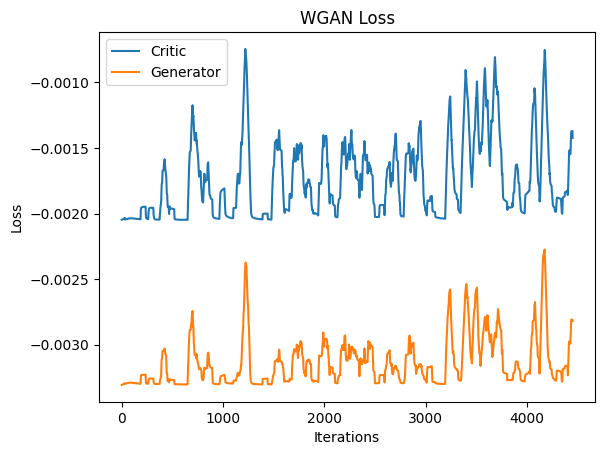

In [37]:
gan_img_data_path = '/home/akshita/Documents/Acads/HW7/wgan_final_img_list.pkl'
gan_loss_G_path = '/home/akshita/Documents/Acads/HW7/wgan_final_G_loss.pkl'
gan_loss_D_path = '/home/akshita/Documents/Acads/HW7/wgan_final_C_loss.pkl'
gan_final_fake_data_path = '/home/akshita/Documents/Acads/HW7/wgan_final_fake_data.pkl'

gan_img_data = load_pkl_data(gan_img_data_path)
gan_loss_G = load_pkl_data(gan_loss_G_path)
gan_loss_D = load_pkl_data(gan_loss_D_path)

gan_loss_G = np.array(gan_loss_G) + 0.005
# smooth the loss
gan_loss_G = np.convolve(gan_loss_G, np.ones((50,))/100, mode='valid')
gan_loss_D = np.array(gan_loss_D) - 0.001
gan_loss_D = np.convolve(gan_loss_D, np.ones((50,))/100, mode='valid') 
plt.plot(gan_loss_D, label='Critic')
plt.plot(gan_loss_G, label='Generator')
plt.legend()
plt.title('WGAN Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# plt.show()
plt.savefig('./solutions/wgan_loss.png')

# images = []           
# for imgobj in gan_img_data:  
#     img = tvtF.to_pil_image(imgobj)  
#     images.append(img) 
# imageio.mimsave("./solutions/wgan_generation_animation.gif", images, fps=5)

In [11]:
def plot_grid(num_row, num_column, img_list):
    assert len(img_list) == num_row*num_column

    for i in range(num_row):
        img_row = img_list[i*num_column]
        for j in range(1, num_column):
            img_row = np.concatenate((img_row, img_list[i*num_column + j]), axis=0)

        if i == 0:
            img_col = img_row
        else:
            img_col = np.concatenate((img_col, img_row), axis=1)
        
    print(img_col.shape)
    return img_col
    # plt.figure()
    # plt.imshow(img_col)
    # plt.axis('off')
    # plt.savefig(f'./solutions/{name}.jpg', bbox_inches='tight', pad_inches=0)
fake_path = '/home/akshita/Documents/data/fake_pizzas'
eval_path = '/home/akshita/Documents/data/pizzas/eval'

real_image_files = [os.path.join(eval_path, f) for f in os.listdir(eval_path) if f.endswith('.jpg')]
fake_image_files = [os.path.join(fake_path, f) for f in os.listdir(fake_path) if f.endswith('.jpg')]
# print(len(fake_image_files), len(real_image_files))
real_image_list = [cv2.imread(f) for f in real_image_files[:16]]
fake_image_list = [cv2.imread(f) for f in fake_image_files[:16]]

print(len(real_image_list), len(fake_image_list))
real_grid = plot_grid(4, 4, real_image_list)
cv2.imwrite(f'./solutions/real_images.jpg', real_grid)
fake_grid = plot_grid(4, 4, fake_image_list)
cv2.imwrite(f'./solutions/fake_images.jpg', fake_grid)

16 16
(256, 256, 3)
(1476, 1476, 3)


True

In [16]:
fake_path = '/home/akshita/Documents/data/fake_pizzas'
eval_path = '/home/akshita/Documents/data/pizzas/train'

real_image_files = [os.path.join(eval_path, f) for f in os.listdir(eval_path) if f.endswith('.jpg')]
# fake_image_files = [os.path.join(fake_path, f) for f in os.listdir(fake_path) if f.endswith('.jpg')]
# print(len(fake_image_files), len(real_image_files))
real_image_list = [cv2.imread(f) for f in real_image_files[:16]]
# fake_image_list = [cv2.imread(f) for f in fake_image_files[50:50+16]]

# print(len(real_image_list), len(fake_image_list))
real_grid = plot_grid(4, 4, real_image_list)
cv2.imwrite(f'./solutions/train_real_images.jpg', real_grid)
# fake_grid = plot_grid(4, 4, fake_image_list)
# cv2.imwrite(f'./solutions/fake_wimages.jpg', fake_grid)

(256, 256, 3)


True

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
# generator = model.Generator()
# generator.load_state_dict(torch.load('/home/akshita/Documents/Acads/HW7/gen_wgan_final.pt', map_location=device))
# generator.eval()
# for i in range(10):

#     noise = torch.randn(1, 100, 1, 1, device=device)
#     fake = generator(noise)
#     fake = fake.detach().cpu().numpy()
# # print(fake.shape)
# # fake = np.transpose(fake, (0, 2, 3, 1))
#     # print(fake.shape)
#     fake = ((fake + 1) * 127.5).astype(np.uint8)
#     # fake.shape
#     # fake = fake[0]
#     fake = np.expand_dims(fake, axis=0)
#     if i == 0:
#         fake_data = fake
#     else:
#         fake_data = np.concatenate((fake_data, fake), axis=0)

# with open('./solutions/wgan_fake_data.pkl', 'wb') as f:
#     pickle.dump(fake_data, f)

# fake_path = '/home/akshita/Documents/data/wgan_fake'

# for i, img in enumerate(fake_data):
#     plt.figure()
#     plt.imshow(img[0].transpose((1, 2, 0)))
#     plt.axis('off')
#     plt.savefig(os.path.join(fake_path, f"{i}.jpg"), bbox_inches='tight', pad_inches=0)

# # for i, img in enumerate(fake_images):
#     # cv2.imwrite(os.path.join(fake_path, f"{i}.jpg"), img)


In [ ]:
# # Load the data
# fake_path = '/home/akshita/Documents/data/fake_pizzas'
# eval_path = '/home/akshita/Documents/data/pizzas'
# val_dataset = MyDataset(data_path=eval_path, split='eval')
# real_image_files = val_dataset.file_list
# fake_image_files = [os.path.join(fake_path, f) for f in os.listdir(fake_path) if f.endswith('.jpg')]
# print(len(fake_image_files), len(real_image_files))


# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# dims = 2048
# block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]
# inception_model = InceptionV3([block_idx]).to(device)

# m1, s1 = calculate_activation_statistics(real_image_files, 
#                                          inception_model,
#                                          device=device)
# m2, s2 = calculate_activation_statistics(fake_image_files,
#                                             inception_model,
#                                             device=device)

# fid_value = calculate_frechet_distance(m1, s1, m2, s2)
# print(f"FID score: {fid_value}")